<a href="https://colab.research.google.com/github/abhijain864/VTON-Intern/blob/main/versace_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Categories are 'men' - ['jackets-coats','blazers','shirts','knitwear','t-shirts','sweatshirts','pants','denim','activewear']
#               'women'- ['dresses','jackets-coats','blazers','knitwear','t-shirts-sweatshirts','skirts','pants-shorts','denim','activewear']

In [ ]:
import requests
import os
from bs4 import BeautifulSoup
import re
HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36',
}
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pwd

Mounted at /content/drive
/content


/content/drive/My Drive/Web_scraping/Versace


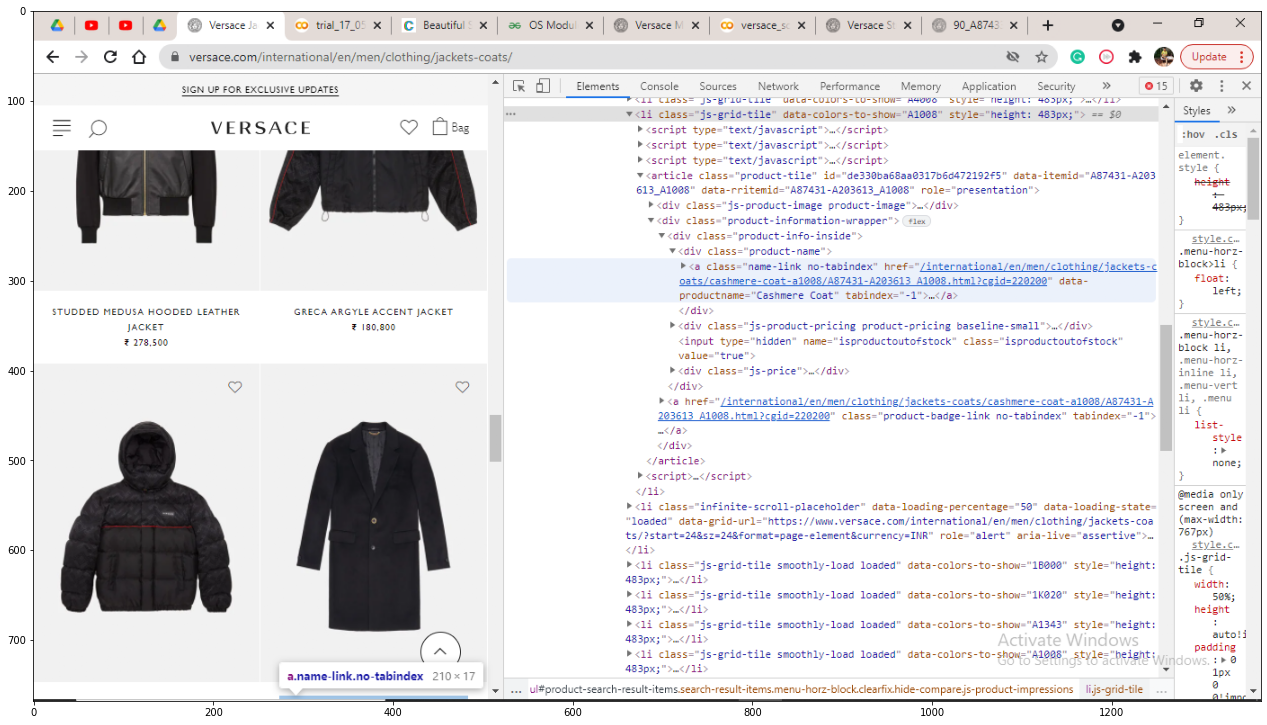

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%cd /content/drive/My Drive/Web_scraping/Versace
z = mpimg.imread('inspect_element.png');plt.figure(figsize=(22,14));plt.imshow(z)
# We use the < a class = 'name-link no-tabindex'> tag for scraping 

In [ ]:
%cd /content/drive/My Drive/Web_scraping/Versace/Versace_images
# %cd /content/drive/My Drive/Trial_purpose

/content/drive/My Drive/Web_scraping/Versace/Versace_images


In [ ]:
def delete_imgs(sure=False):
  if sure:
    for pic in os.listdir('/content/drive/My Drive/Web_scraping/Versace/Versace_images'):
      os.remove(pic)

In [ ]:
def func_img_category(url):
  return(re.split('/',url)[5]+ '_' + re.split('/',url)[7] + '_')

In [ ]:
def func_description(img_page_link):
  return(re.split('/',img_page_link)[8])

In [ ]:
def save(img_category,img_urls,description,want_descrip = False):
  global count
  if len(img_urls)<4 :
    return
  file_name = img_category + str(count) + '_0'
  with open(file_name + '.jpg','wb') as f:
    im = requests.get(img_urls[0],headers=HEADERS)
    f.write(im.content)   
  file_name = img_category + str(count) + '_1'
  with open(file_name + '.jpg','wb') as f:
    im = requests.get(img_urls[3],headers=HEADERS)
    f.write(im.content) 
  file_name = img_category + str(count) + '_2'
  with open(file_name + '.jpg','wb') as f:
    im = requests.get(img_urls[1],headers=HEADERS)
    f.write(im.content) 
  if want_descrip:
    print(img_category + str(count),end=' ')
    print(' name is ',description)
  else:
    print(img_category + str(count))
  count=count+1

In [ ]:
def generate_image_urls(url):
  pattern = re.compile(r'/dw.+=fit')
  poses = []
  r = requests.get(url, headers=HEADERS)  ;  soup = BeautifulSoup(r.text,'html.parser')  ;  images = soup.find_all('img')
  for image in images:
    img_url = image.get('data-lgimg')
    if img_url is not None:
      if re.search(pattern,img_url):
        img_url = 'https://www.versace.com' + re.search(pattern,img_url).group()
        # print('img_url',img_url)
        poses.append(img_url)
  return poses

In [ ]:
def scroll_down(url):
  # print(url)
  scroll_down_url_set = []
  scroll_down_url_set.append(url)
  r = requests.get(url, headers=HEADERS) ; soup = BeautifulSoup(r.text,'html.parser') ; link = soup.find('span',class_="js-results-found-breadcrumb results-found-breadcrumb")
  no_of_products = int(re.split(' ',link.string)[0][1:])
  for i in range(int(np.ceil(no_of_products/24))-1):
    new_url =  url + '?start=' + str(24*(i+1)) + '&amp;sz=24&amp;format=page-element&amp;currency=ALL'
    # print(new_url)
    scroll_down_url_set.append(new_url)
  return scroll_down_url_set

In [ ]:
def scrape(url,want_descrip=False):
  img_category = func_img_category(url) # Gives for ex Mens_jackets
  print('sraping_',img_category) 

  scroll_down_url_set = scroll_down(url) # Set of all urls upon scrolling through the whole webpage 


  for url in scroll_down_url_set:
    r = requests.get(url, headers=HEADERS) ; soup = BeautifulSoup(r.text,'html.parser')
    for link in soup.find_all('a',class_="name-link no-tabindex"):
      img_page_link = 'https://www.versace.com' + link.get('href')
      # print(url)
      description = func_description(img_page_link) # In case you want product name for ex ''Wool & Mohair Blend Blazer''
      img_urls = generate_image_urls(img_page_link)
      save(img_category,img_urls,description,want_descrip)

In [ ]:
def url_generator(gender,list_of_category):
  urls = []
  for ctg in list_of_category:
    urls.append('https://www.versace.com/international/en/' + gender  +  '/clothing/'+ctg+'/')
  return urls

In [ ]:
def scrape_these_urls(urls):
  for url in urls:
    scrape(url,want_descrip=True)

In [ ]:
# Run this only one time, add additional categories in another snippet
count=1
delete_imgs(True)
scrape_these_urls(url_generator('men',['jackets-coats','blazers','shirts','knitwear','t-shirts','sweatshirts','pants','denim','activewear']))
scrape_these_urls(url_generator('women',['dresses','jackets-coats','blazers','knitwear','t-shirts-sweatshirts','skirts','pants-shorts','denim','activewear']))

sraping_ men_jackets-coats_
men_jackets-coats_1  name is  tresor-de-la-mer-print-jacket-5w030
men_jackets-coats_2  name is  tresor-de-la-mer-print-jacket-5y010
men_jackets-coats_3  name is  medusa-puffer-jacket-a1008
men_jackets-coats_4  name is  medusa-puffer-jacket-1u040
men_jackets-coats_5  name is  medusa-amplified-print-jacket-5b000
men_jackets-coats_6  name is  greca-pattern-quilted-jacket-a1008
men_jackets-coats_7  name is  greca-puffer-jacket-a1008
men_jackets-coats_8  name is  greca-puffer-jacket-a1008
men_jackets-coats_9  name is  greca-nappa-leather-bomber-jacket-2b020
men_jackets-coats_10  name is  greca-nappa-leather-bomber-jacket-2b150
men_jackets-coats_11  name is  puffer-jacket-a1008
men_jackets-coats_12  name is  denim-jacket-1d030
men_jackets-coats_13  name is  barocco-mosaic-print-jacket-5l000
men_jackets-coats_14  name is  barocco-mosaic-motif-jacket-2b020
men_jackets-coats_15  name is  barocco-mosaic-print-reversible-bomber-jacket-5w060
men_jackets-coats_16  name i

In [ ]:
# Add additional categories you want to scrape here
#scrape_these_urls('gender','give more categories')



---



---



#The below code is just for debugging

In [ ]:
# url = 'https://www.versace.com/international/en/men/clothing/jackets-coats/'
# r = requests.get(url, headers=HEADERS,timeout=50)
# soup = BeautifulSoup(r.text,'html.parser')
# for link in soup.find_all('a',class_="name-link no-tabindex"):
#   url = 'https://www.versace.com' + link.get('href')
#   print(url)

https://www.versace.com/international/en/men/clothing/jackets-coats/tresor-de-la-mer-print-jacket-5w030/A89028-1F00977_5W030.html?cgid=220200
https://www.versace.com/international/en/men/clothing/jackets-coats/tresor-de-la-mer-print-jacket-5y010/A89028-1F00977_5Y010.html?cgid=220200
https://www.versace.com/international/en/men/clothing/jackets-coats/medusa-puffer-jacket-a1008/A88691-A233255_A1008.html?cgid=220200
https://www.versace.com/international/en/men/clothing/jackets-coats/medusa-puffer-jacket-1u040/A88691-A233255_1U040.html?cgid=220200
https://www.versace.com/international/en/men/clothing/jackets-coats/medusa-amplified-print-jacket-5b000/A88427-1F00539_5B000.html?cgid=220200
https://www.versace.com/international/en/men/clothing/jackets-coats/greca-pattern-quilted-jacket-a1008/A87432-A230630_A1008.html?cgid=220200
https://www.versace.com/international/en/men/clothing/jackets-coats/greca-puffer-jacket-a1008/A88692-A233255_A1008.html?cgid=220200
https://www.versace.com/internation